In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercice 1

## Question 1

In [3]:
def generate(x = 0, sigma = 1, n = 10):
    return np.random.normal(loc = x, scale = sigma, size = n)

In [4]:
x1 = generate(sigma = 0.1, n = 4)
x2 = generate(sigma = 0.2, n = 10)

## Question 2

In [11]:
def Moy_estim_x(x1, x2):
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    return ((x1.sum() +x2.sum()) /
                  (n1 +n2))

In [12]:
def MLE_estim_x(x1, x2, sigma1, sigma2):
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    return ((sigma2**2*n1*x1.mean() +sigma1**2*n2*x2.mean()) /
                  (sigma2**2*n1 +sigma1**2*n2))

In [13]:
sigma1 = 0.1
sigma2 = 0.3
n1 = 4
n2 = 10
MLE = np.zeros(1000)
Moyenne = np.zeros(1000)
for i in range(1000):
    x1 = generate(sigma = sigma1, n = n1)
    x2 = generate(sigma = sigma2, n = n2)
    MLE[i] = MLE_estim_x(x1, x2, sigma1, sigma2)
    Moyenne[i] = Moy_estim_x(x1, x2)

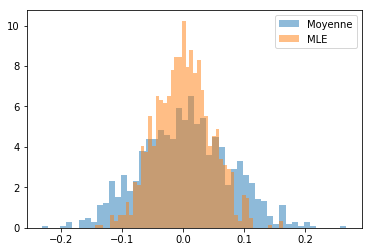

In [7]:
plt.hist(Moyenne, label = 'Moyenne',bins=50,density=1,alpha= 0.5)
plt.hist(MLE, label='MLE',bins=50,density=1,alpha= 0.5)
plt.legend()

In [15]:
print("Moyenne MLE: ",MLE.mean())
print("Moyenne Moyenne arithmétique: ",Moyenne.mean())

print("Ecart type MLE: ",MLE.std())
print("Ecart type Moyenne arithmétique: ",Moyenne.std())

Moyenne MLE:  0.0023242858796297884
Moyenne Moyenne arithmétique:  0.006417778688292299
Ecart type MLE:  0.04450522625098867
Ecart type Moyenne arithmétique:  0.06968279487204154


Comme on pouvait s'y attendre, la méthode MLE est meilleure : l'écart type de MLE est plus faible et l'espérance est plus proche de 0 que pour la moyenne arithmétique. Cela est dû au fait que pour MLE, on tient compte de la variance de nos capteurs.

In [16]:
def std_estimateur(n= 1000, sigma1 = 0.1, sigma2 = 0.3, n1 = 4, n2 = 10 ):
    """ Retourne l'écart type de l'agrégat x* (estimé avec MLE)
    pour n réalisations """
    MLE = np.zeros(n)
    for i in range(n):
        x1 = generate(sigma = sigma1, n = n1)
        x2 = generate(sigma = sigma2, n = n2)
        MLE[i] = MLE_estim_x(x1, x2, sigma1, sigma2)
    return MLE.std()

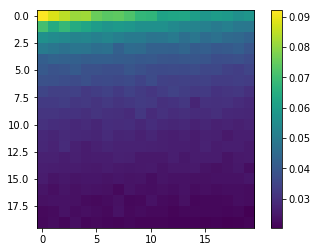

In [17]:
MLE_std = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        MLE_std[i,j] = std_estimateur(n1 = i+1, n2 = j+1)
plt.imshow(MLE_std, interpolation='none')
plt.colorbar()

La variance de l'estimateur décroit avec le nombre de points.<br>
Cette décroissance est plus rapide quand on augmente le nombre de points de la source 1 plutôt que la source 2.<br>
Ceci est normal car la première source est plus précise (écart type plus faible)

## Question 3

In [18]:
def MAP_estim(x1, x2, x0, sigma1, sigma2, sigma0):
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    return ((n1*x1.mean()/sigma1**2 + n2*x2.mean()/sigma2**2 + x0/sigma0**2) /
                  (n1/sigma1**2 + n2/sigma2**2 + 1/sigma0**2))

In [78]:
MAP = np.zeros(1000)
MLE = np.zeros(1000)
Moyenne = np.zeros(1000)

n1_0 = 2
n2_0 = 5

sigma1 = 0.1
sigma2 = 0.3

n1 = 2
n2 = 5
for i in range(1000):
    # Génération des données du prior pour 
    #l'estimation de x_0 et sigma_0
    x1_0 = generate(sigma = sigma1, n = n1_0)
    x2_0 = generate(sigma = sigma2, n = n2_0)
    #x0 = Moy_estim_x(x1_0,x2_0)
    x0 = MLE_estim_x(x1_0, x2_0, sigma1, sigma2)
    #sigma0 = std_estimateur(n1 = 10, n2 = 5,n=200)
    sigma0 = MLE_std[n1_0-1,n2_0-1]
    
    # Génération des nouvelles données
    x1 = generate(sigma = sigma1, n = n1)
    x2 = generate(sigma = sigma2, n = n2)
    MAP[i] = MAP_estim(x1, x2, x0, sigma1, sigma2, sigma0)
    MLE[i] = MLE_estim_x(np.hstack((x1_0, x1)), 
                         np.hstack((x2_0, x2)),sigma1, sigma2)
    Moyenne[i] = Moy_estim_x(np.hstack((x1_0, x1)), 
                             np.hstack((x2_0, x2)))
    

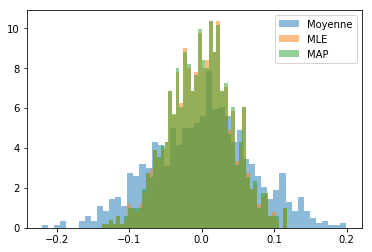

In [79]:
plt.hist(Moyenne, label = 'Moyenne',bins=50,density=1,alpha= 0.5)
plt.hist(MLE, label='MLE',bins=50,density=1,alpha= 0.5)
plt.hist(MAP, label = 'MAP',bins=50,density=1,alpha= 0.5)

plt.legend();

In [80]:
MLE.std(),MAP.std()

(0.04387258063156258, 0.04387621510416939)

L'estimateur avec MLE et l'estimateur avec MAP donnent presque le même résultat. Le MLE devrait être plus précis normalement car il a en quelque sorte plus de données, comparé au MAP qui fait une première synthèse des données x1_0 et x2_0.

# Exercice 2

In [13]:
def estim_sigma(xi, x):
    return np.mean((xi-x)**2)

In [14]:
def F(xstar, sigma1, sigma2, x1, x2):
    return (MLE_estim_x(x1,x2,sigma1,sigma2), 
            np.sqrt(estim_sigma(x1, xstar)),
           np.sqrt(estim_sigma(x2, xstar)))

In [31]:
sigma1 = 8
sigma2 =3
x = 10
x1 = generate(x=x, sigma = sigma1, n = 2)
x2 = generate(x=x, sigma = sigma2, n = 4)

In [45]:
def estim_contrac(x1, x2, n=10,xstar_init =15, s1_init =22 ,s2_init =22):
    xstar = xstar_init
    s1 = s1_init
    s2 = s2_init
    Xstar_history = np.zeros(n)
    S1_history = np.zeros(n)
    S2_history = np.zeros(n)
    for i in range(n):
        Xstar_history[i] = xstar
        S1_history[i] = s1
        S2_history[i] = s2

        xstar, s1,s2 =  F(xstar, s1, s2, x1, x2)
    return xstar,Xstar_history,S1_history,S2_history

In [33]:
xstar, s1,s2

(9.52650154601885, 8.4165047608331, 3.660692117160044)

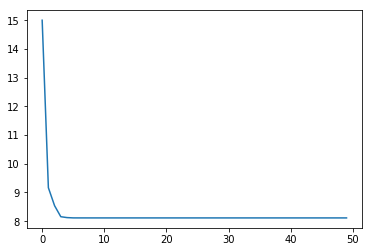

In [18]:
plt.plot(Xstar_history)

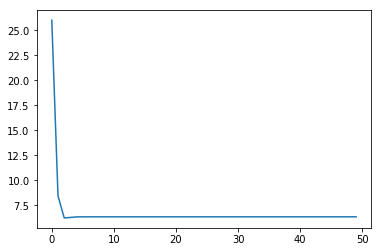

In [19]:
plt.plot(S1_history)

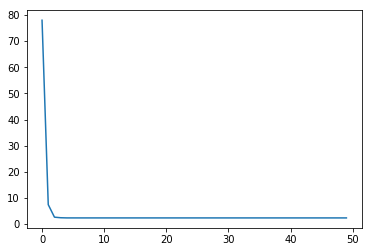

In [20]:
plt.plot(S2_history)

x*, sigma1 et sigma2 convergent vite.

In [46]:
sigma1 = 0.1
sigma2 = 0.3
n1 = 4
n2 = 10
MLE = np.zeros(1000)
Moyenne = np.zeros(1000)
Contrac = np.zeros(1000)
for i in range(1000):
    x1 = generate(sigma = sigma1, n = n1)
    x2 = generate(sigma = sigma2, n = n2)
    MLE[i] = MLE_estim_x(x1, x2, sigma1, sigma2)
    Moyenne[i] = Moy_estim_x(x1, x2)
    Contrac[i],_,_,_ = estim_contrac(x1, x2)

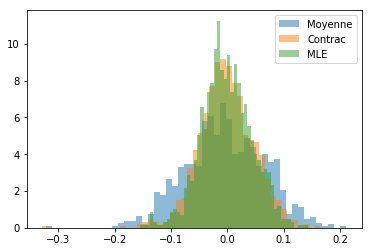

In [47]:
plt.hist(Moyenne, label = 'Moyenne',bins=50,density=1,alpha= 0.5)
plt.hist(Contrac, label = 'Contrac',bins=50,density=1,alpha= 0.5)
plt.hist(MLE, label='MLE',bins=50,density=1,alpha= 0.5)
plt.legend()

In [48]:
Contrac.std()

0.04913152807931737

In [49]:
MLE.std()

0.04492368095930752

Avec la contraction, on obtient de bons résultats : presque aussi bons qu'avec MLE.